In [1]:
#!/usr/bin/python

# Import required modules
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker as mpltkr
import matplotlib.colors as mplcolors
import matplotlib.patches as mplpatches
import matplotlib.collections as mplcollections

# Import COSMO style toolkit
import cosmoplot.colorbars as cosmocbars
import cosmoplot.style as cosmostyle
import cosmoplot.utils as cosmoutils

cosmostyle.set_style('article')
colorList = cosmostyle.color_cycle

# Property Selection

In [4]:
# Load DEEM learning curves
# Matrix Format: data = [pca, width, sigma, no. training points, x]
# x = 0: pca
# x = 1: width
# x = 2: sigma
# x = 3: jitter
# x = 4: no. training points
# x = 5: error (MAE/RMSE)
# x = 6: standard deviation of error
# For example, data[-1, -1, -1, -1, :, 5] contains the error values for all the training points
# at the final pca, width, and sigma designations. The corresponding training point values are 
# stored in data[-1, -1, -1, -1, :, 4]

testMAE = np.load('/local/scratch/helfrech/sync/gdrive/Projects/Zeolites/Processed_Data/DEEM_1k/Volume/6.0/ParameterSearch/Gaussian/maeAvgTest.npy')

width:  1.0
sigma:  0.03


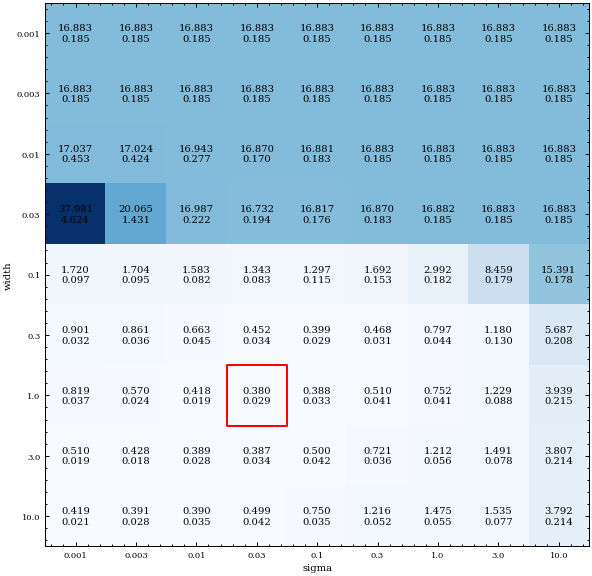

In [5]:
figParam = plt.figure(figsize=(10, 10))
axs = figParam.add_subplot(1, 1, 1)

axs.imshow(testMAE[0, :, :, 0, 0, 5], cmap='Blues')
axs.set_xticks(range(0, testMAE.shape[2]))
axs.set_xticklabels(testMAE[0, 0, :, 0, 0, 2])
axs.set_yticks(range(0, testMAE.shape[1]))
axs.set_yticklabels(testMAE[0, :, 0, 0, 0, 1])
axs.set_xlabel('sigma')
axs.set_ylabel('width')

for i in axs.get_xticks():
    for j in axs.get_yticks():
        axs.text(i, j, str('%.3f\n%.3f' % (testMAE[0, j, i, 0, 0, 5], testMAE[0, j, i, 0, 0, 6])),
                verticalalignment='center', horizontalalignment='center')
xyMin = np.argmin(testMAE[0, :, :, 0, 0, 5])
ncol = testMAE.shape[2]
posMat = (xyMin % ncol - 0.5, xyMin / ncol - 0.5)
pos = (xyMin/ncol, xyMin%ncol)

print 'width: ', testMAE[0, pos[0], pos[1], 0, 0, 1]
print 'sigma: ', testMAE[0, pos[0], pos[1], 0, 0, 2]

r = mplpatches.Rectangle(xy=posMat, width=1, height=1)
pc = mplcollections.PatchCollection([r], facecolor='None', edgecolor='r', linewidth=2)
axs.add_collection(pc)
plt.show()